# Наивный байесовский классификатор
## Цель работы
Научиться применять модели наивного байесовского классификатора с использованием библиотеки sklearn для решения задач машинного обучения.

## Содержание работы
1. Загрузите датасет breast_cancer из библиотеки sklearn.
2. Выведите в виде гистограммы распределения непрерывных атрибутов в этом наборе данных.
3. Постройте модель наивного байесовского классификатора на первых двух столбцах и оцените ее качество.
4. Постройте ту же модель на полном датасете и сравните ее качество с первой.
5. Отберите признаки, соответствующие выбранному модельному виду распределения. Постройте модель на выбранных признаках и сравните ее с предыдущей.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.datasets import load_breast_cancer

### 1. Загрузите датасет breast_cancer из библиотеки sklearn.

In [35]:
data = load_breast_cancer()

In [36]:
X = data.data[:,:2]
y = data.target

In [37]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

### 2. Выведите в виде гистограммы распределения непрерывных атрибутов в этом наборе данных.

<Axes: xlabel='mean radius', ylabel='mean texture'>

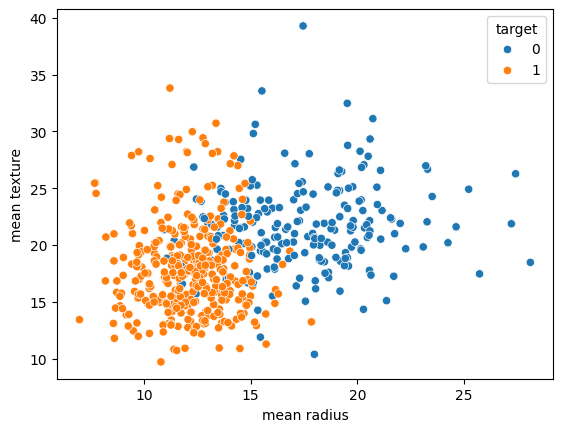

In [38]:
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=df['target'])

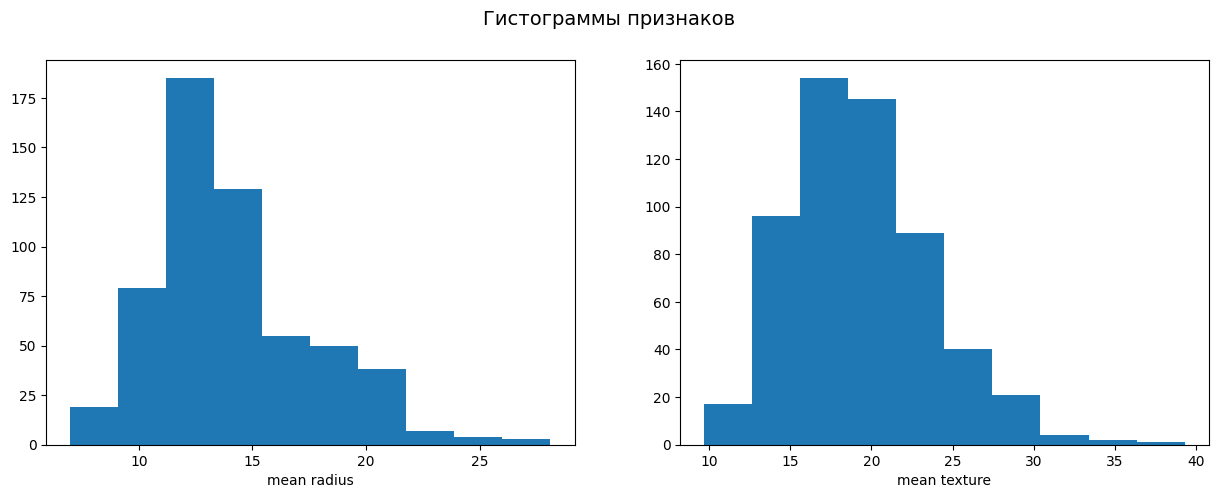

In [39]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

### 3. Постройте модель наивного байесовского классификатора на первых двух столбцах и оцените ее качество.

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [41]:
gaussian_nb = GaussianNB()

In [42]:
gaussian_nb.fit(X, y)

GaussianNB()

In [43]:
y_pred = gaussian_nb.predict(X)

In [44]:
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


### 4. Постройте ту же модель на полном датасете и сравните ее качество с первой.

In [45]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [46]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


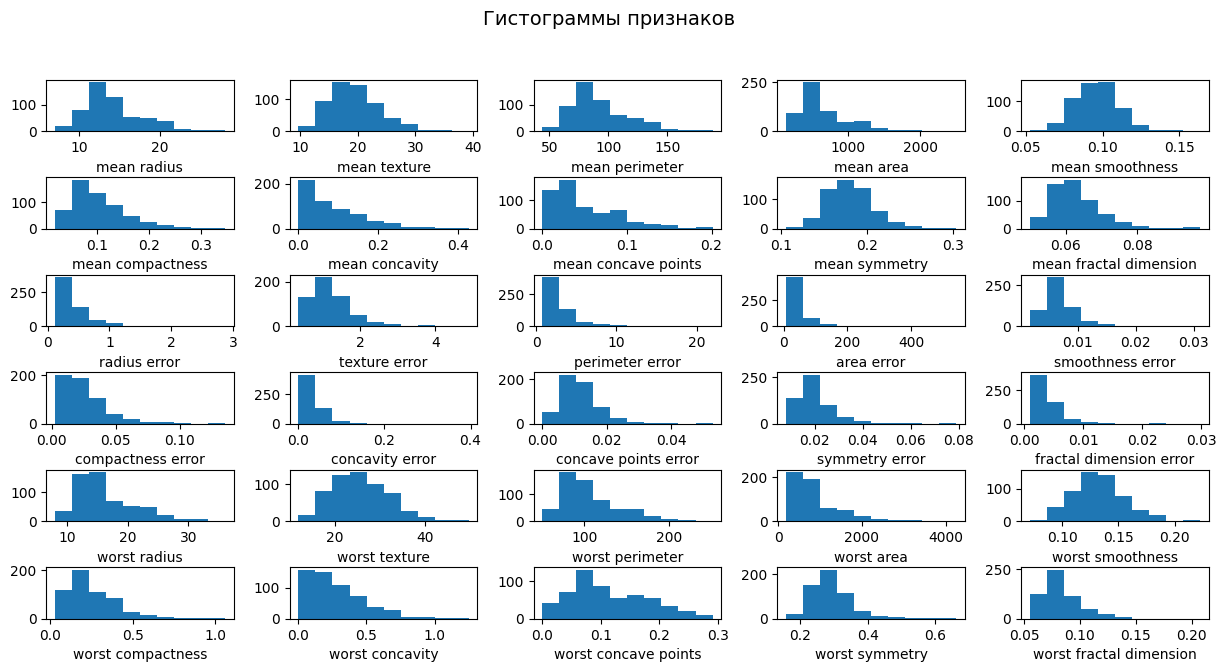

In [47]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

### 5. Отберите признаки, соответствующие выбранному модельному виду распределения. Постройте модель на выбранных признаках и сравните ее с предыдущей.

In [48]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [49]:
df = df.drop(['mean concavity','radius error', 
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'], 
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678,0


In [50]:
X = df.drop('target', axis=1)
y = df['target']

In [51]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


## Задания для самостоятельного выполнения

### 1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [53]:
def apply_naive_bayes_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "CategoricalNB": CategoricalNB(),
        "ComplementNB": ComplementNB()
    }
    
    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            f1_scor = f1_score(y_test, y_pred)
            print(f"{name} Accuracy: {acc:.4f}")
            print(f"{name} F1 score: {f1_scor:.4f}", end='\n\n')
        except Exception as e:
            print(f"{name} не применим: {e}")

In [54]:
apply_naive_bayes_models(X, y)

MultinomialNB Accuracy: 0.8684
MultinomialNB F1 score: 0.8951

BernoulliNB Accuracy: 0.6228
BernoulliNB F1 score: 0.7676

CategoricalNB не применим: index 1 is out of bounds for axis 1 with size 1
ComplementNB Accuracy: 0.8684
ComplementNB F1 score: 0.8951



### 2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм распределния эмпирических данных. 
### 3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [55]:
titanic = pd.read_csv('data/titanic.csv')

In [56]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
titanic.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)  


In [58]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [59]:
titanic.fillna(titanic.mean(numeric_only=True), inplace=True)  

In [61]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
    label_encoders[col] = le

C:\Users\Datanomica\AppData\Local\Temp\ipykernel_14956\3788534501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)


In [62]:
X = titanic.drop(columns=["Survived"])
y = titanic["Survived"]

In [63]:
apply_naive_bayes_models(X, y)

MultinomialNB Accuracy: 0.6983
MultinomialNB F1 score: 0.5846

BernoulliNB Accuracy: 0.7821
BernoulliNB F1 score: 0.7273

CategoricalNB Accuracy: 0.7598
CategoricalNB F1 score: 0.6950

ComplementNB Accuracy: 0.7039
ComplementNB F1 score: 0.6074

